# THE EFFECT OF MINIMUM WAGES ON LOW-WAGE JOBS:
EVIDENCE FROM THE UNITED STATES USING A BUNCHING ESTIMATOR

**Importing relevant databases and loading in the CSV file**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the CSV file
df = pd.read_csv('/content/mw_state_changes.csv')

**Cleaning and transforming the data**

In [8]:
# Clean and Transform Data
df['year'] = pd.to_datetime(df['year'], format='%Y')
df.sort_values('year', inplace=True)
df['mw_change'] = df['mw'].diff()
df.fillna(method='ffill', inplace=True)  # Forward fill to handle missing values

**Defining X and Y variables**

In [10]:
# Define X and y after initial data preparation
X = df[['mw_change']]  # Independent variable
y = df['mw_healthinsurance']  # Assuming this is your dependent variable

# Handling NaN and infinite values after defining X and y
X.fillna(0, inplace=True)
y.fillna(y.mean(), inplace=True)
X.replace([np.inf, -np.inf], 0, inplace=True)
y.replace([np.inf, -np.inf], 0, inplace=True)

<ipython-input-10-19615dd7813a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)
<ipython-input-10-19615dd7813a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], 0, inplace=True)


**Visualizing the data in a time-series graph**

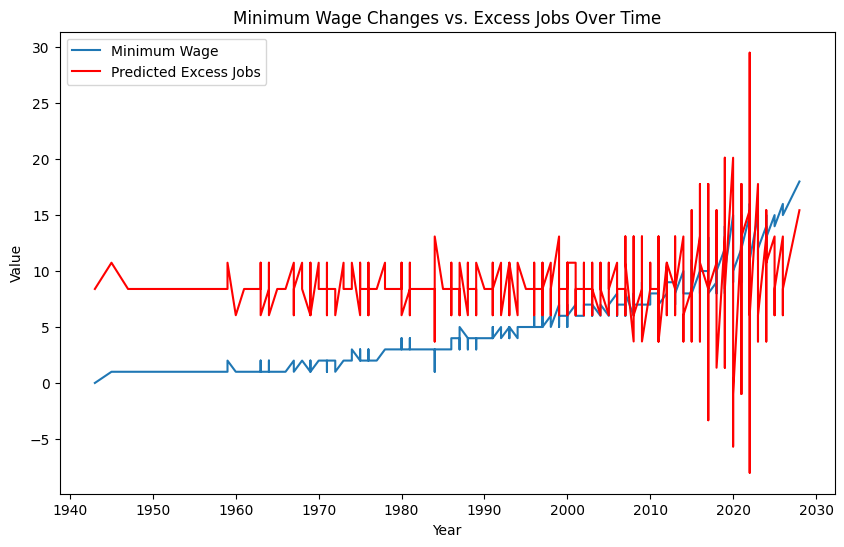

Model Coefficient: [2.34543022]
Model Intercept: 8.398115018951563


In [11]:
# Simple linear regression
model = LinearRegression()
model.fit(X, y)
df['predicted_excess_jobs'] = model.predict(X)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['mw'], label='Minimum Wage')
plt.plot(df['year'], df['predicted_excess_jobs'], label='Predicted Excess Jobs', color='red')
plt.title('Minimum Wage Changes vs. Excess Jobs Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

# Print model coefficients and intercept
print("Model Coefficient:", model.coef_)
print("Model Intercept:", model.intercept_)

**Displaying the summary statistics**

In [12]:
# Print summary statistics for all numerical columns
print(df.describe())

       State FIPS Code        month          day           mw  \
count      1185.000000  1185.000000  1185.000000  1185.000000   
mean         22.719831     2.935865     3.095359    11.146835   
std          14.120709     3.401501     7.197751     6.104831   
min           1.000000     1.000000     1.000000     0.000000   
25%          15.000000     1.000000     1.000000     6.000000   
50%          15.000000     1.000000     1.000000    10.000000   
75%          33.000000     4.000000     1.000000    18.000000   
max          56.000000    12.000000    31.000000    18.000000   

       mw_healthinsurance  mw_smallbusiness    mw_youth    mw_change  \
count         1185.000000        929.000000  686.000000  1184.000000   
mean            11.129502         11.678149    8.043732     1.165541   
std              6.109969          3.868357    0.204647     1.843302   
min              0.400000          5.000000    8.000000    -7.000000   
25%              6.150000          7.000000    8.00000